In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import sklearn

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier,  RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

PHASE 1: DATA PREPROCESSING AND FEATURE ENGINEERING

In [13]:
# 13 excel files for weather
weather_data = ['/content/processed1.xlsx','/content/processed2.xlsx','/content/processed3.xlsx' ,
                '/content/processed4.xlsx','/content/processed5.xlsx','/content/processed6.xlsx' ,
                '/content/processed7.xlsx','/content/processed8.xlsx','/content/processed9.xlsx',
                '/content/processed10.xlsx','/content/processed11.xlsx','/content/processed12.xlsx',
                '/content/processed13.xlsx']
weather_data = pd.concat([pd.read_excel(d) for d in weather_data], ignore_index=True)

# Save the combined data to a single file
weather_data.to_csv("combined_weather_data.csv", index=False)


In [14]:
weather_data.columns = weather_data.columns.str.lower().str.strip()        #ensure column names are clean
weather_data

,time,temperature,dew point,humidity,wind speed,pressure,precipitation
0,3.0,97.0,77.0,74.0,14.0,28.8,0.0
1,4.0,88.8,74.5,63.4,8.9,28.8,0.0
2,5.0,81.0,72.0,47.0,5.0,28.7,0.0
3,6.0,99.0,79.0,79.0,12.0,28.8,0.0
4,7.0,91.5,75.8,61.3,6.7,28.8,0.0
...,...,...,...,...,...,...,...
1087,NaN,85.5,71.7,65.2,5.4,28.7,NaN
1088,NaN,75.0,70.0,41.0,0.0,28.6,NaN
1089,NaN,95.0,77.0,84.0,9.0,28.8,NaN
1090,NaN,86.3,74.1,67.9,2.2,28.7,NaN


In [15]:
weather_data.head()

,time,temperature,dew point,humidity,wind speed,pressure,precipitation
0,3.0,97.0,77.0,74.0,14.0,28.8,0.0
1,4.0,88.8,74.5,63.4,8.9,28.8,0.0
2,5.0,81.0,72.0,47.0,5.0,28.7,0.0
3,6.0,99.0,79.0,79.0,12.0,28.8,0.0
4,7.0,91.5,75.8,61.3,6.7,28.8,0.0


In [16]:
weather_data.columns

Index(['time', 'temperature', 'dew point', 'humidity', 'wind speed',
       'pressure', 'precipitation'],
      dtype='object')

In [6]:
train = pd.read_csv(r"/content/combined_train_files.csv")
train

<ipython-input-6-f9bd659dc568>:1: DtypeWarning: Columns (4,54,74,79,92,109,126,131,163,203,221,226,243,244,256,264,283,290,299,300,301,303,304,309,317,336,341,353,357,375,399,425,442,469,484,493,494,515,535,552,573,589,606,623,649,684,713,771,787,803,824,841,858,862,880,885,918,940,960,977,1000,1027,1034,1053,1069,1075,1087,1107,1134,1149,1158,1171,1225,1230,1248,1269,1292,1313,1334,1361,1388,1392,1410,1419,1432,1448,1453,1472,1481,1500,1504,1512,1513,1514,1516,1517,1522,1527,1539,1579,1599,1607,1620,1642,1647,1659,1664,1682,1727,1743,1744,1745,1747,1748,1753,1779,1784,1802,1825,1834,1849,1850,1851,1855,1866,1922,1950,1968,1997,2030,2056,2064,2065,2082,2083,2095,2133,2139,2151,2168,2173,2191,2212,2219,2231,2238,2251,2256,2268,2299,2306,2343,2360,2381,2410,2429,2446,2454,2473,2488,2510,2526,2542,2550,2563,2576,2577,2578,2580,2581,2586,2592,2625,2642,2650,2669,2678,2679,2692,2700,2719,2720,2751,2752,2764,2780,2803,2811,2824,2846,2853,2883,2930,2949,2966,2971,2989,2990,2996,3028,3054,3070

,0.type,0.status,0.departure.iataCode,0.departure.icaoCode,0.departure.terminal,0.departure.scheduledTime,0.departure.estimatedTime,0.departure.actualTime,0.departure.estimatedRunway,0.departure.actualRunway,...,101.arrival.actualTime,101.arrival.estimatedRunway,101.arrival.actualRunway,125.arrival.actualTime,125.arrival.estimatedRunway,125.arrival.actualRunway,282.arrival.actualTime,282.arrival.estimatedRunway,282.arrival.actualRunway,625.departure.gate
0,departure,active,lhe,opla,m,2023-07-20t20:50:00.000,2023-07-20t20:00:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,departure,active,lhe,opla,NaN,2023-08-04t15:05:00.000,2023-08-04t15:05:00.000,2023-08-04t15:14:00.000,2023-08-04t15:14:00.000,2023-08-04t15:14:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,lhe,opla,m,2023-08-19t16:45:00.000,2023-08-19t16:05:00.000,2023-08-19t16:35:00.000,2023-08-19t16:35:00.000,2023-08-19t16:35:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,active,lhe,opla,m,2023-09-09t04:20:00.000,2023-09-09t04:20:00.000,2023-09-09t04:55:00.000,2023-09-09t04:55:00.000,2023-09-09t04:55:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,departure,active,lhe,opla,m,2023-09-23t21:10:00.000,2023-09-23t21:10:00.000,2023-09-23t21:02:00.000,2023-09-23t21:02:00.000,2023-09-23t21:02:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,departure,active,isb,opis,NaN,2024-05-15t23:20:00.000,2024-05-16t01:20:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,departure,active,isb,opis,NaN,2024-05-24t03:35:00.000,2024-05-24t03:35:00.000,2024-05-24t03:48:00.000,2024-05-24t03:48:00.000,2024-05-24t03:48:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,departure,active,isb,opis,NaN,2024-06-04t04:30:00.000,2024-06-04t04:30:00.000,2024-06-04t04:32:00.000,2024-06-04t04:32:00.000,2024-06-04t04:32:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,departure,active,isb,opis,NaN,2024-06-17t08:35:00.000,2024-06-17t08:35:00.000,2024-06-17t08:40:00.000,2024-06-17t08:40:00.000,2024-06-17t08:40:00.000,...,2024-06-28t16:01:00.000,2024-06-28t16:01:00.000,2024-06-28t16:01:00.000,2024-06-29t15:26:00.000,2024-06-29t15:26:00.000,2024-06-29t15:26:00.000,2024-06-19t16:42:00.000,2024-06-19t16:42:00.000,2024-06-19t16:42:00.000,a5


In [7]:
print(train.columns)

Index(['0.type', '0.status', '0.departure.iataCode', '0.departure.icaoCode',
       '0.departure.terminal', '0.departure.scheduledTime',
       '0.departure.estimatedTime', '0.departure.actualTime',
       '0.departure.estimatedRunway', '0.departure.actualRunway',
       ...
       '101.arrival.actualTime', '101.arrival.estimatedRunway',
       '101.arrival.actualRunway', '125.arrival.actualTime',
       '125.arrival.estimatedRunway', '125.arrival.actualRunway',
       '282.arrival.actualTime', '282.arrival.estimatedRunway',
       '282.arrival.actualRunway', '625.departure.gate'],
      dtype='object', length=38011)


In [8]:
print(train.head())

      0.type 0.status 0.departure.iataCode 0.departure.icaoCode  \
0  departure   active                  lhe                 opla   
1  departure   active                  lhe                 opla   
2  departure   active                  lhe                 opla   
3  departure   active                  lhe                 opla   
4  departure   active                  lhe                 opla   

  0.departure.terminal 0.departure.scheduledTime 0.departure.estimatedTime  \
0                    m   2023-07-20t20:50:00.000   2023-07-20t20:00:00.000   
1                  NaN   2023-08-04t15:05:00.000   2023-08-04t15:05:00.000   
2                    m   2023-08-19t16:45:00.000   2023-08-19t16:05:00.000   
3                    m   2023-09-09t04:20:00.000   2023-09-09t04:20:00.000   
4                    m   2023-09-23t21:10:00.000   2023-09-23t21:10:00.000   

    0.departure.actualTime 0.departure.estimatedRunway  \
0  2023-07-20t20:15:00.000     2023-07-20t20:15:00.000   
1  2023-08-0

In [17]:
# data merged
# Reset indices and concatenate datasets
weather_data = weather_data.reset_index(drop=True)
train = train.reset_index(drop=True)

# Combine them side by side
combined_data = pd.concat([train, weather_data], axis=1)

print("Combined Data:")
combined_data.head()


Combined Data:


,0.type,0.status,0.departure.iataCode,0.departure.icaoCode,0.departure.terminal,0.departure.scheduledTime,0.departure.estimatedTime,0.departure.actualTime,0.departure.estimatedRunway,0.departure.actualRunway,...,Day of Week,Hour of Day,Month,time,temperature,dew point,humidity,wind speed,pressure,precipitation
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20t20:00:00.000,2023-07-20 20:15:00,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,3.0,20.0,7.0,3.0,97.0,77.0,74.0,14.0,28.8,0.0
1,departure,active,lhe,opla,NaN,2023-08-04 15:05:00,2023-08-04t15:05:00.000,2023-08-04 15:14:00,2023-08-04t15:14:00.000,2023-08-04t15:14:00.000,...,4.0,15.0,8.0,4.0,88.8,74.5,63.4,8.9,28.8,0.0
2,departure,active,lhe,opla,m,2023-08-19 16:45:00,2023-08-19t16:05:00.000,2023-08-19 16:35:00,2023-08-19t16:35:00.000,2023-08-19t16:35:00.000,...,5.0,16.0,8.0,5.0,81.0,72.0,47.0,5.0,28.7,0.0
3,departure,active,lhe,opla,m,2023-09-09 04:20:00,2023-09-09t04:20:00.000,2023-09-09 04:55:00,2023-09-09t04:55:00.000,2023-09-09t04:55:00.000,...,5.0,4.0,9.0,6.0,99.0,79.0,79.0,12.0,28.8,0.0
4,departure,active,lhe,opla,m,2023-09-23 21:10:00,2023-09-23t21:10:00.000,2023-09-23 21:02:00,2023-09-23t21:02:00.000,2023-09-23t21:02:00.000,...,5.0,21.0,9.0,7.0,91.5,75.8,61.3,6.7,28.8,0.0


In [15]:
combined_data.to_csv('combined_data.csv',index=False)

In [18]:
# Handle Missing Values
def handle_missing_values(data):

    # Filling missing numeric values with the mean
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

    return data

# Format Time Fields
def format_time(data, time_columns):
    for col in time_columns:
        if col in data.columns:
            try:
                # Convert to standard datetime format
                data[col] = pd.to_datetime(data[col], errors='coerce')
            except Exception as e:
                print(f"Error converting column {col} to datetime: {e}")
    return data


In [22]:
# Apply transformations
# Replace 'Scheduled', 'Actual', 'Estimated Time' with the actual time field names in your dataset
time = ['scheduledTime', 'actualTime', 'estimatedTime']

# Handle missing values
cleaned_data = handle_missing_values(combined_data)

# Format time fields
cleaned_data = format_time(cleaned_data, time)

# Save the cleaned dataset
cleaned_data.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved to 'cleaned_dataset.csv'")

Cleaned dataset saved to 'cleaned_dataset.csv'


In [23]:
cleaned_data.head()

,0.type,0.status,0.departure.iataCode,0.departure.icaoCode,0.departure.terminal,0.departure.scheduledTime,0.departure.estimatedTime,0.departure.actualTime,0.departure.estimatedRunway,0.departure.actualRunway,...,282.arrival.estimatedRunway,282.arrival.actualRunway,625.departure.gate,time,temperature,dew point,humidity,wind speed,pressure,precipitation
0,departure,active,lhe,opla,m,2023-07-20t20:50:00.000,2023-07-20t20:00:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,NaN,NaN,NaN,3.0,97.0,77.0,74.0,14.0,28.8,0.0
1,departure,active,lhe,opla,NaN,2023-08-04t15:05:00.000,2023-08-04t15:05:00.000,2023-08-04t15:14:00.000,2023-08-04t15:14:00.000,2023-08-04t15:14:00.000,...,NaN,NaN,NaN,4.0,88.8,74.5,63.4,8.9,28.8,0.0
2,departure,active,lhe,opla,m,2023-08-19t16:45:00.000,2023-08-19t16:05:00.000,2023-08-19t16:35:00.000,2023-08-19t16:35:00.000,2023-08-19t16:35:00.000,...,NaN,NaN,NaN,5.0,81.0,72.0,47.0,5.0,28.7,0.0
3,departure,active,lhe,opla,m,2023-09-09t04:20:00.000,2023-09-09t04:20:00.000,2023-09-09t04:55:00.000,2023-09-09t04:55:00.000,2023-09-09t04:55:00.000,...,NaN,NaN,NaN,6.0,99.0,79.0,79.0,12.0,28.8,0.0
4,departure,active,lhe,opla,m,2023-09-23t21:10:00.000,2023-09-23t21:10:00.000,2023-09-23t21:02:00.000,2023-09-23t21:02:00.000,2023-09-23t21:02:00.000,...,NaN,NaN,NaN,7.0,91.5,75.8,61.3,6.7,28.8,0.0


### **FEATURE ENGINEERING**

In [19]:
# Ensure the datetime format for the relevant columns
train['0.departure.actualTime'] = pd.to_datetime(train['0.departure.actualTime'], errors='coerce')
train['0.departure.scheduledTime'] = pd.to_datetime(train['0.departure.scheduledTime'], errors='coerce')

# Calculate Departure Delay in minutes
# Use .notna() to avoid operations on missing values
if '0.departure.actualTime' in train.columns and '0.departure.scheduledTime' in train.columns:
    train['Departure Delay (min)'] = (
        (train['0.departure.actualTime'] - train['0.departure.scheduledTime'])
        .dt.total_seconds() / 60
    )
else:
    print("Columns '0.departure.actualTime' or '0.departure.scheduledTime' are missing.")

# Extract Temporal Features
if '0.departure.scheduledTime' in train.columns:
    train['Day of Week'] = train['0.departure.scheduledTime'].dt.dayofweek  # Monday=0, Sunday=6
    train['Hour of Day'] = train['0.departure.scheduledTime'].dt.hour
    train['Month'] = train['0.departure.scheduledTime'].dt.month
else:
    print("Column '0.departure.scheduledTime' is missing for extracting temporal features.")

# Merge Weather Data with Train Data
# Ensure 'time' in weather_data and '0.departure.scheduledTime' in train are datetime
weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')

if '0.departure.scheduledTime' in train.columns and 'time' in weather_data.columns:
    train_data = train.merge(
        weather_data,
        left_on='0.departure.scheduledTime',
        right_on='time',
        how='left'
    )
else:
    print("Required columns for merging ('0.departure.scheduledTime' or 'time') are missing.")

# Preview the resulting DataFrame
print(train.head())
print(train_data.head())


      0.type 0.status 0.departure.iataCode 0.departure.icaoCode  \
0  departure   active                  lhe                 opla   
1  departure   active                  lhe                 opla   
2  departure   active                  lhe                 opla   
3  departure   active                  lhe                 opla   
4  departure   active                  lhe                 opla   

  0.departure.terminal 0.departure.scheduledTime 0.departure.estimatedTime  \
0                    m       2023-07-20 20:50:00   2023-07-20t20:00:00.000   
1                  NaN       2023-08-04 15:05:00   2023-08-04t15:05:00.000   
2                    m       2023-08-19 16:45:00   2023-08-19t16:05:00.000   
3                    m       2023-09-09 04:20:00   2023-09-09t04:20:00.000   
4                    m       2023-09-23 21:10:00   2023-09-23t21:10:00.000   

  0.departure.actualTime 0.departure.estimatedRunway 0.departure.actualRunway  \
0    2023-07-20 20:15:00     2023-07-20t20:15:0

# **EDA**

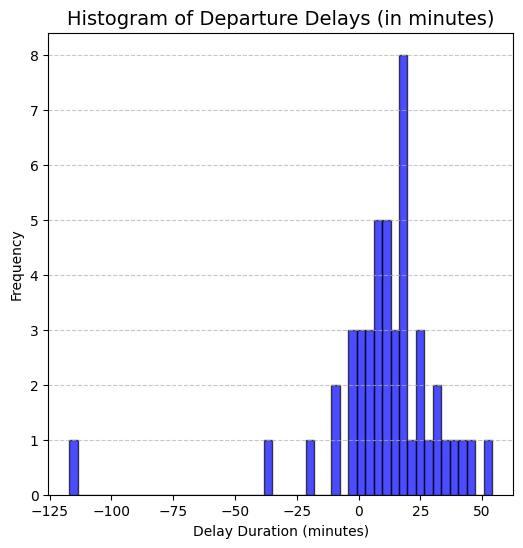

In [44]:
# (a) Delay Distributions
plt.figure(figsize=(6, 6))
plt.hist(train['Departure Delay (min)'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Departure Delays (in minutes)', fontsize=14)
plt.xlabel('Delay Duration (minutes)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

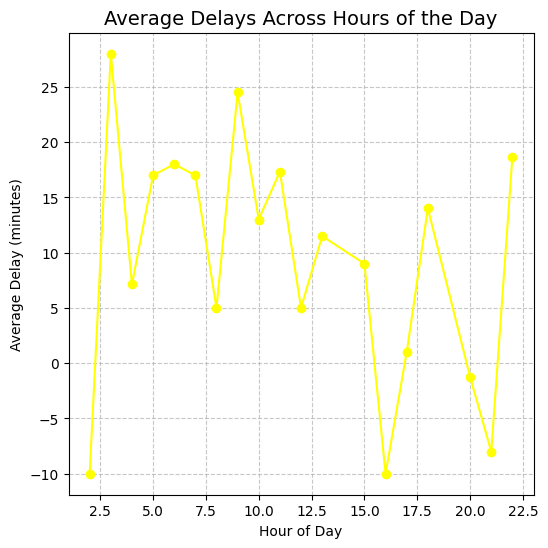

In [45]:
# (b) Temporal Analysis
# Delays across hours
temporal_hour = train.groupby('Hour of Day')['Departure Delay (min)'].mean().reset_index()
plt.figure(figsize=(6, 6))
plt.plot(temporal_hour['Hour of Day'], temporal_hour['Departure Delay (min)'], marker='o', color='yellow')
plt.title('Average Delays Across Hours of the Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=10)
plt.ylabel('Average Delay (minutes)', fontsize=10)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

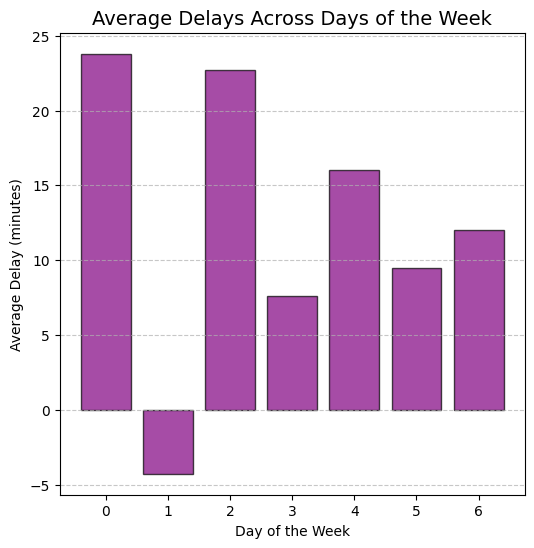

In [41]:
# Delays across days of the week
temporal_day = train.groupby('Day of Week')['Departure Delay (min)'].mean().reset_index()
plt.figure(figsize=(6, 6))
plt.bar(temporal_day['Day of Week'], temporal_day['Departure Delay (min)'], color='purple', alpha=0.7, edgecolor='black')
plt.title('Average Delays Across Days of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=10)
plt.ylabel('Average Delay (minutes)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

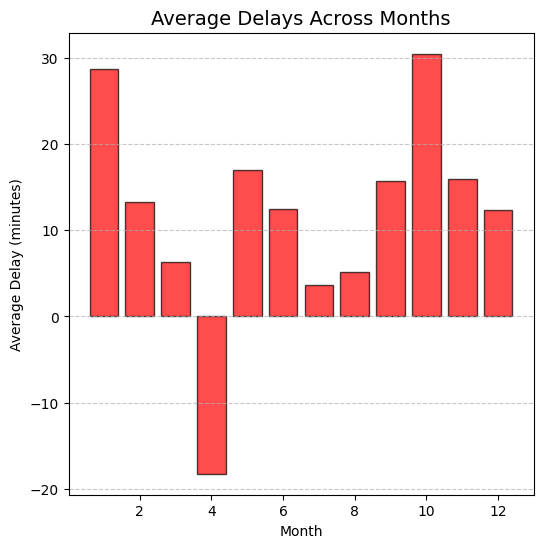

In [40]:
# Delays across months
temporal_month = train.groupby('Month')['Departure Delay (min)'].mean().reset_index()
plt.figure(figsize=(6, 6))
plt.bar(temporal_month['Month'], temporal_month['Departure Delay (min)'], color='red', alpha=0.7, edgecolor='black')
plt.title('Average Delays Across Months', fontsize=14)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Average Delay (minutes)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

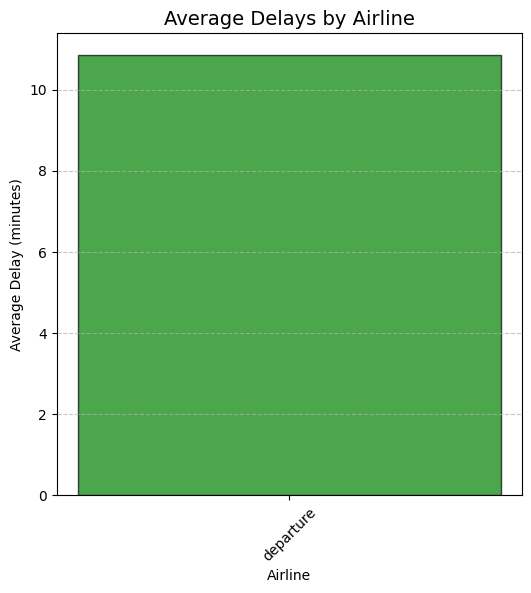

In [43]:
# (c) Category-Wise Analysis
# Group delays by airline
airline_delay = train.groupby('0.type')['Departure Delay (min)'].mean().reset_index()
plt.figure(figsize=(6, 6))
plt.bar(airline_delay['0.type'], airline_delay['Departure Delay (min)'], color='green', alpha=0.7, edgecolor='black')
plt.title('Average Delays by Airline', fontsize=14)
plt.xlabel('Airline', fontsize=10)
plt.ylabel('Average Delay (minutes)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

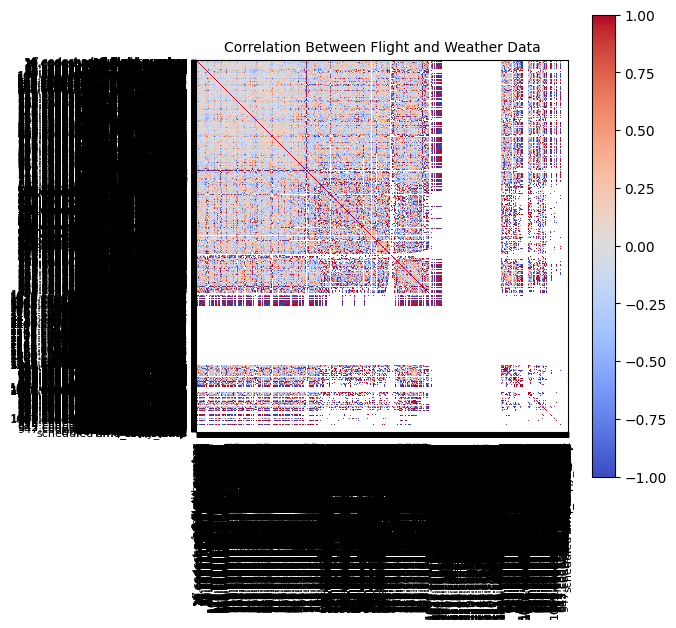

In [49]:
# 2. Correlation Analysis
# Ensure the 'departure.scheduledTime' and 'time' columns are in a comparable numeric format (e.g., as timestamps)
weather_flight_corr = train.merge(weather_data, left_on='0.departure.scheduledTime', right_on='time', how='left')

# Convert time columns to timestamps or similar numeric values (if they aren't already)
weather_flight_corr['scheduledTime_timestamp'] = pd.to_datetime(weather_flight_corr['0.departure.scheduledTime']).astype(int) / 10**9
weather_flight_corr['time_timestamp'] = pd.to_datetime(weather_flight_corr['time']).astype(int) / 10**9

# the correlation matrix excluding non-numeric columns
correlation_matrix = weather_flight_corr.select_dtypes(include=['number']).corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Between Flight and Weather Data', fontsize=10)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90, fontsize=8)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=8)
plt.show()



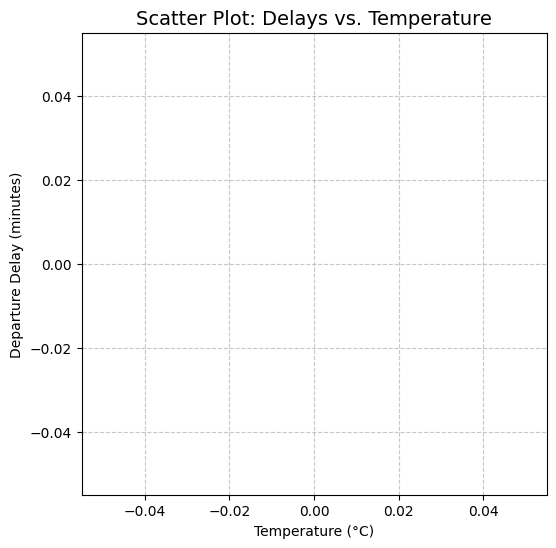

In [50]:
# Scatter plot of delays vs. temperature
plt.figure(figsize=(6, 6))
plt.scatter(weather_flight_corr['temperature'], weather_flight_corr['Departure Delay (min)'], alpha=0.6, color='orange', edgecolor='black')
plt.title('Scatter Plot: Delays vs. Temperature', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=10)
plt.ylabel('Departure Delay (minutes)', fontsize=10)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [62]:
weather_flight_corr.columns

Index(['0.type', '0.status', '0.departure.iataCode', '0.departure.icaoCode',
       '0.departure.terminal', '0.departure.scheduledTime',
       '0.departure.estimatedTime', '0.departure.actualTime',
       '0.departure.estimatedRunway', '0.departure.actualRunway',
       ...
       'delay_class', 'time', 'temperature', 'dew point', 'humidity',
       'wind speed', 'pressure', 'precipitation', 'scheduledTime_timestamp',
       'time_timestamp'],
      dtype='object', length=38025)

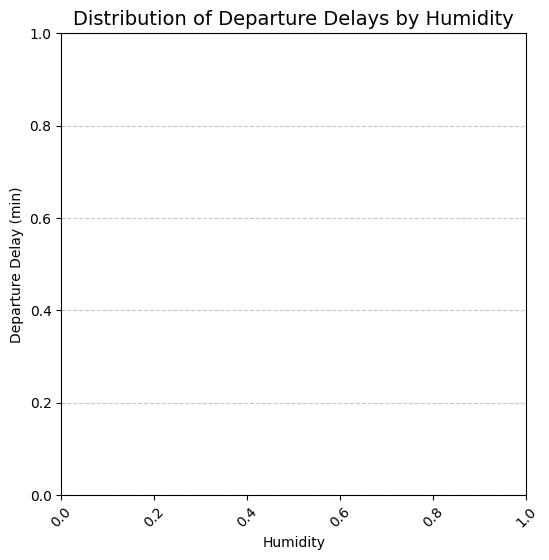

In [66]:
plt.figure(figsize=(6, 6))

# Group the data by humidity
weather_conditions = weather_flight_corr[['humidity', 'Departure Delay (min)']]
grouped = weather_conditions.groupby('humidity')

# Filter out empty groups
grouped_data = []
labels = []
for name, group in grouped:
    delay_data = group['Departure Delay (min)'].dropna()
    if not delay_data.empty:
        grouped_data.append(delay_data.values)  # Ensure values are passed as a list
        labels.append(name)

# Create the boxplot
# plt.boxplot(grouped_data, labels=labels, patch_artist=True, boxprops=dict(facecolor='pink', color='black'),
            #medianprops=dict(color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'))

# Customize the plot
plt.title('Distribution of Departure Delays by Humidity', fontsize=14)
plt.xlabel('Humidity', fontsize=10)
plt.ylabel('Departure Delay (min)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the boxplot
plt.show()

# **PHASE 3: ANALYTICAL AND PREDICTIVE TASKS**

In [10]:
train.columns

Index(['0.type', '0.status', '0.departure.iataCode', '0.departure.icaoCode',
       '0.departure.terminal', '0.departure.scheduledTime',
       '0.departure.estimatedTime', '0.departure.actualTime',
       '0.departure.estimatedRunway', '0.departure.actualRunway',
       ...
       '101.arrival.actualTime', '101.arrival.estimatedRunway',
       '101.arrival.actualRunway', '125.arrival.actualTime',
       '125.arrival.estimatedRunway', '125.arrival.actualRunway',
       '282.arrival.actualTime', '282.arrival.estimatedRunway',
       '282.arrival.actualRunway', '625.departure.gate'],
      dtype='object', length=38011)

In [20]:
train['Day of Week']

,Day of Week
0,3
1,4
2,5
3,5
4,5
...,...
66,2
67,4
68,1
69,0


Accuracy: 0.9600
F1-Score: 0.9677
Confusion Matrix:
 [[ 9  0]
 [ 1 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.94      0.97        16

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25



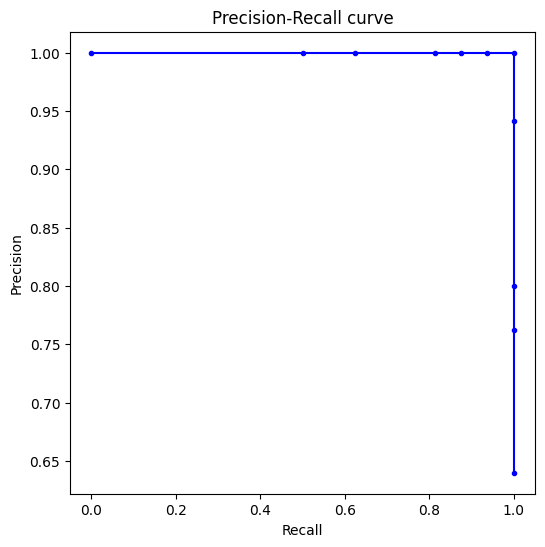

In [92]:
# binary classification
train['delay_class'] = (train['Departure Delay (min)'] > 0).astype(int)  # 1 for delayed, 0 for on-time
features_binary = train[['Departure Delay (min)', 'Day of Week']]

# Split the data into training and testing sets
X = features_binary
y = train['delay_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model_binary = RandomForestClassifier(random_state=42)
model_binary.fit(X_train, y_train)

# Predictions
y_pred_binary = model_binary.predict(X_test)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision, recall, _ = precision_recall_curve(y_test, model_binary.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

metrics = {
    'Accuracy': [accuracy],
    'F1-Score': [f1],
    'Confusion Matrix': [conf_matrix],
    'Classification Report': [str(class_report)]
}

metrics_df = pd.DataFrame(metrics)

# Save the dataframe to a CSV file
metrics_df.to_csv('model_performance.csv', index=False)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [45]:
print(X.isna().sum())

Departure Delay (min)    12
Day of Week               0
dtype: int64


In [59]:
# Check for NaN in the target variable
print("NaN values in y_train_multi:", np.isnan(y_train_multi).sum())

# Compute the mode without using scipy
unique_values, counts = np.unique(y_train_multi[~np.isnan(y_train_multi)], return_counts=True)
mode_value = unique_values[np.argmax(counts)]

# Replace NaN with the mode
y_train_multi = np.where(np.isnan(y_train_multi), mode_value, y_train_multi)

# Ensure no NaNs remain
print("NaN values after handling:", np.isnan(y_train_multi).sum())

# Fit the model
model_multi.fit(X_train_multi, y_train_multi)


NaN values in y_train_multi: 0
NaN values after handling: 0


RandomForestClassifier(random_state=42)

In [93]:
# multi class classification
# Handle missing values in 'Departure Delay (min)'
train['Departure Delay (min)'] = train['Departure Delay (min)'].fillna(0)  # Replace NaN with 0 (or a meaningful value)

# Define delay bins and labels
bins = [0, 45, 175, float('inf')]  # Define delay bins
labels = ['No Delay', 'Short Delay', 'Moderate Delay']
train['delay_category'] = pd.cut(
    train['Departure Delay (min)'],
    bins=bins,
    labels=labels,
    right=False
)

# Ensure no NaN in 'delay_category'
train['delay_category'] = train['delay_category'].cat.add_categories('Unknown').fillna('Unknown')

# Define features and target
features_multi = train[['Departure Delay (min)', 'Hour of Day', 'Month']].fillna(0)
X_multi = features_multi
y_multi = train['delay_category']

# Split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.5, random_state=42
)

# Train the model
model_multi = RandomForestClassifier(random_state=42)
model_multi.fit(X_train_multi, y_train_multi)

# Predictions
y_pred_multi = model_multi.predict(X_test_multi)

# Performance metrics
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)
f1_multi = f1_score(y_test_multi, y_pred_multi, average='weighted')  # for multi-class, weighted average F1
conf_matrix_multi = confusion_matrix(y_test_multi, y_pred_multi)
class_report_multi = classification_report(y_test_multi, y_pred_multi)

# Print evaluation metrics
print(f"Accuracy: {accuracy_multi:.4f}")
print(f"F1-Score (Weighted): {f1_multi:.4f}")
print("Confusion Matrix:\n", conf_matrix_multi)
print("Classification Report:\n", class_report_multi)

metrics = {
    'Accuracy': [accuracy],
    'F1-Score': [f1],
    'Confusion Matrix': [conf_matrix],
    'Classification Report': [str(class_report)]
}

metrics_df = pd.DataFrame(metrics)

# Save the dataframe to a CSV file
metrics_df.to_csv('model_performance_multi.csv', index=False)

Accuracy: 0.9200
F1-Score (Weighted): 0.8951
Confusion Matrix:
 [[22  0  0]
 [ 1  0  0]
 [ 1  0  1]]
Classification Report:
               precision    recall  f1-score   support

    No Delay       0.92      1.00      0.96        22
 Short Delay       0.00      0.00      0.00         1
     Unknown       1.00      0.50      0.67         2

    accuracy                           0.92        25
   macro avg       0.64      0.50      0.54        25
weighted avg       0.89      0.92      0.90        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [102]:
# Regression Analysis

# Prepare features and target
features_reg = train[['Hour of Day', 'Month']].fillna(0)
target_reg = train['Departure Delay (min)'].fillna(0)

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    features_reg, target_reg, test_size=0.5, random_state=42
)

# Train a regression model
model_reg = RandomForestRegressor(random_state=42)
model_reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = model_reg.predict(X_test_reg)

# Evaluate performance
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")

# Cross-validation
cv_scores = cross_val_score(model_reg, features_reg, target_reg, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

# Create a DataFrame with the steps as rows
steps = [

    f"Evaluate performance using MAE", mae,
    f"RMSE", rmse,
    f"Cross-validation for RMSE",cv_rmse
]

df = pd.DataFrame({"Steps": steps})

# Define the file path where the CSV will be saved
file_path = r'C:\Users\DELL\Desktop\ML Project\regression_analysis.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

# Return the file path for download
file_path

Mean Absolute Error (MAE): 14.2384
Root Mean Square Error (RMSE): 18.7113
Cross-Validation RMSE: 18.0673 ± 4.4091


'C:\\Users\\DELL\\Desktop\\ML Project\\regression_analysis.csv'

### **MODEL OPTIMIZATION AND EVALUATION**

In [70]:
# Hyperparameter tuning
# GridSearchCV

# Define parameter grid for Random Forest Regressor
param_grid_reg = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search cross validation
grid_search_reg = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_reg,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Perform grid search
grid_search_reg.fit(features_reg, target_reg)

# Best parameters and score
print("Best Parameters (Regression):", grid_search_reg.best_params_)
best_reg_model = grid_search_reg.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters (Regression): {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}


In [78]:
# Create target variable for binary classification
train['is_delayed'] = (train['Departure Delay (min)'] > 0).astype(int)

# Define features and target for binary classification
X_binary = train[['Hour of Day', 'Month']]  # Replace with your feature column names
y_binary = train['is_delayed']

# Split into training and testing sets
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)


In [79]:
param_grid_bin = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': [None, 'balanced']
}

grid_search_bin = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_bin,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search_bin.fit(X_binary, y_binary)

print("Best Parameters (Binary Classification):", grid_search_bin.best_params_)
best_bin_model = grid_search_bin.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters (Binary Classification): {'class_weight': None, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [84]:
# Define delay categories
bins = [0, 45, 175, float('inf')]  # Bins for delay thresholds
labels = ['No Delay', 'Short Delay', 'Moderate Delay']

# Create target variable for multi-class classification
train['delay_category'] = pd.cut(train['Departure Delay (min)'], bins=bins, labels=labels, right=False)

# Define features and target for multi-class classification
X_multi = train[['Hour of Day', 'Month', 'Day of Week']]  # Replace with your feature column names
y_multi = train['delay_category']

# Split into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)


In [89]:

# Check for missing values
print(X_multi.isna().sum())
print(pd.Series(y_multi).isna().sum())

# Handle missing values if any
X_multi = X_multi.fillna(X_multi.mean())  # Impute features with mean
y_multi = pd.Series(y_multi).fillna(y_multi.mode()[0])  # Impute target with mode

# Encode target variable if it's categorical
encoder = LabelEncoder()
y_multi = encoder.fit_transform(y_multi)

# Define parameter grid for grid search
param_grid_multi = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV
grid_search_multi = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_multi,
    cv=5,
    scoring='accuracy',
    verbose=3,  # Set to 3 for more detailed output
    n_jobs=-1
)

# Fit the model
grid_search_multi.fit(X_multi, y_multi)

# Best parameters and model
print("Best Parameters (Multi-Class Classification):", grid_search_multi.best_params_)
best_multi_model = grid_search_multi.best_estimator_


Hour of Day    0
Month          0
Day of Week    0
dtype: int64
5
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters (Multi-Class Classification): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [72]:
# K-fold cross validation
cv_scores_reg = cross_val_score(best_reg_model, features_reg, target_reg, cv=5, scoring='neg_mean_squared_error')
cv_rmse_reg = np.sqrt(-cv_scores_reg)

print(f"Regression Model - Cross-Validation RMSE: {cv_rmse_reg.mean():.4f} ± {cv_rmse_reg.std():.4f}")


Regression Model - Cross-Validation RMSE: 16.7581 ± 4.0624


In [90]:
cv_scores_bin = cross_val_score(best_bin_model, X_binary, y_binary, cv=5, scoring='accuracy')
print(f"Binary Classification - Cross-Validation Accuracy: {cv_scores_bin.mean():.4f} ± {cv_scores_bin.std():.4f}")


Binary Classification - Cross-Validation Accuracy: 0.4600 ± 0.1356


In [91]:
cv_scores_multi = cross_val_score(best_multi_model, X_multi, y_multi, cv=5, scoring='accuracy')
print(f"Multi-Class Classification - Cross-Validation Accuracy: {cv_scores_multi.mean():.4f} ± {cv_scores_multi.std():.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Multi-Class Classification - Cross-Validation Accuracy: 0.9800 ± 0.0400


In [ ]:
#### model comparison
## RMSE  for regression  {cv_rmse_reg.mean()} ± {cv_rmse_reg.std()}
## Accuracy for binary classification {cv_scores_bin.mean()} ± {cv_scores_bin.std()}
## Accuracy for multi-class classification {cv_scores_multi.mean()} ± {cv_scores_multi.std()}

### **MODEL TESTING**

In [105]:
### test dataset

In [4]:
test = pd.read_csv(r"/content/combined_test_files.csv")
test.head()

,0.type,0.status,0.departure.iataCode,0.departure.icaoCode,0.departure.scheduledTime,0.departure.estimatedRunway,0.departure.actualRunway,0.arrival.iataCode,0.arrival.icaoCode,0.arrival.scheduledTime,...,105.arrival.actualTime,105.arrival.estimatedRunway,105.arrival.actualRunway,69.departure.gate,29.arrival.actualTime,29.arrival.estimatedRunway,29.arrival.actualRunway,205.arrival.actualTime,205.arrival.estimatedRunway,205.arrival.actualRunway
0,departure,active,lhe,opla,2023-07-17t20:35:00.000,2023-07-17t20:46:00.000,2023-07-17t20:46:00.000,khi,opkc,2023-07-17t22:20:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,departure,active,lhe,opla,2023-08-08t09:55:00.000,NaN,NaN,doh,othh,2023-08-08t11:55:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,lhe,opla,2023-08-27t22:00:00.000,NaN,NaN,khi,opkc,2023-08-27t23:45:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,active,lhe,opla,2023-09-02t10:05:00.000,NaN,NaN,dxb,omdb,2023-09-02t12:30:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,departure,active,lhe,opla,2023-09-26t21:10:00.000,2023-09-26t21:21:00.000,2023-09-26t21:21:00.000,doh,othh,2023-09-26t23:10:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
test.columns

Index(['0.type', '0.status', '0.departure.iataCode', '0.departure.icaoCode',
       '0.departure.scheduledTime', '0.departure.estimatedRunway',
       '0.departure.actualRunway', '0.arrival.iataCode', '0.arrival.icaoCode',
       '0.arrival.scheduledTime',
       ...
       '105.arrival.actualTime', '105.arrival.estimatedRunway',
       '105.arrival.actualRunway', '69.departure.gate',
       '29.arrival.actualTime', '29.arrival.estimatedRunway',
       '29.arrival.actualRunway', '205.arrival.actualTime',
       '205.arrival.estimatedRunway', '205.arrival.actualRunway'],
      dtype='object', length=6069)

In [27]:
print(len(test))
print(len(y_pred_binary_str))

71
36


In [29]:

# Preprocess test dataset to match training
if 'Scheduled Time' in test.columns:
    test['Day of Week'] = pd.to_datetime(test['Scheduled Time']).dt.dayofweek

if 'Estimated Time' in test.columns and 'Scheduled Time' in test.columns:
    test['Departure Delay (min)'] = (
        pd.to_datetime(test['Estimated Time']) - pd.to_datetime(test['Scheduled Time'])
    ).dt.total_seconds() / 60

# Verify columns
required_features = ['Departure Delay (min)', 'Day of Week']
missing_features = [col for col in required_features if col not in test.columns]

if missing_features:
    print(f"Missing features: {missing_features}")
else:
    # Proceed with predictions
    X_test = test[required_features]
    y_pred_binary = model_binary.predict(X_test)
    y_pred_binary_str = ['delayed' if pred == 1 else 'on-time' for pred in y_pred_binary]

    # Continue with submission DataFrame creation
    submission_df = pd.DataFrame({
        'File Name': ['test'] * len(y_pred_binary_str),
        'Flight Number': test['Flight Number'],  # Adjust as needed
        'Type': test['Type'],  # Ensure this column exists
        'Status': test['Status'],  # Ensure this column exists
        'Departure IATA Code': test['Departure IATA Code'],
        'Departure ICAO Code': test['Departure ICAO Code'],
        'Scheduled Time': test['Scheduled Time'],
        'Arrival IATA Code': test['Arrival IATA Code'],
        'Arrival ICAO Code': test['Arrival ICAO Code'],
        'Arrival Estimated Time': test['Arrival Estimated Time'],
        'Delay': y_pred_binary_str
    })

    # Save to CSV
    submission_df.to_csv('kaggle_submission.csv', index=False)



Missing features: ['Departure Delay (min)', 'Day of Week']


In [31]:

rename_mapping = {
    '0.type': 'Type',
    '0.status': 'Status',
    '0.departure.iataCode': 'Departure IATA Code',
    '0.departure.icaoCode': 'Departure ICAO Code',
    '0.departure.scheduledTime': 'Scheduled Time',
    '0.arrival.iataCode': 'Arrival IATA Code',
    '0.arrival.icaoCode': 'Arrival ICAO Code',
    '0.arrival.scheduledTime': 'Arrival Estimated Time',
    # Additional mappings for other columns as required
    '0.fileName': 'File Name',
    '105.arrival.actualTime': 'Arrival Estimated Time',  # Example if applicable
    '105.arrival.estimatedRunway': 'Arrival Estimated Runway',  # If relevant
    '69.departure.gate': 'Departure Gate',  # Example mapping
    '205.arrival.actualTime': 'Arrival Actual Time'  # Extend as needed
}

# Assuming your dataset is loaded in `df`
df = pd.DataFrame(test)

# Rename the columns
df.rename(columns=rename_mapping, inplace=True)

# Verify the renaming
print(df.columns)


Index(['Type', 'Status', 'Departure IATA Code', 'Departure ICAO Code',
       'Scheduled Time', '0.departure.estimatedRunway',
       '0.departure.actualRunway', 'Arrival IATA Code', 'Arrival ICAO Code',
       'Arrival Estimated Time',
       ...
       'Arrival Estimated Runway', '105.arrival.actualRunway',
       'Departure Gate', '29.arrival.actualTime', '29.arrival.estimatedRunway',
       '29.arrival.actualRunway', 'Arrival Actual Time',
       '205.arrival.estimatedRunway', '205.arrival.actualRunway',
       'Flight Number'],
      dtype='object', length=6070)


In [32]:
test.head()

,0.type,0.status,0.departure.iataCode,0.departure.icaoCode,0.departure.scheduledTime,0.departure.estimatedRunway,0.departure.actualRunway,0.arrival.iataCode,0.arrival.icaoCode,0.arrival.scheduledTime,...,105.arrival.estimatedRunway,105.arrival.actualRunway,69.departure.gate,29.arrival.actualTime,29.arrival.estimatedRunway,29.arrival.actualRunway,205.arrival.actualTime,205.arrival.estimatedRunway,205.arrival.actualRunway,Flight Number
0,departure,active,lhe,opla,2023-07-17t20:35:00.000,2023-07-17t20:46:00.000,2023-07-17t20:46:00.000,khi,opkc,2023-07-17t22:20:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A
1,departure,active,lhe,opla,2023-08-08t09:55:00.000,NaN,NaN,doh,othh,2023-08-08t11:55:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A
2,departure,active,lhe,opla,2023-08-27t22:00:00.000,NaN,NaN,khi,opkc,2023-08-27t23:45:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A
3,departure,active,lhe,opla,2023-09-02t10:05:00.000,NaN,NaN,dxb,omdb,2023-09-02t12:30:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A
4,departure,active,lhe,opla,2023-09-26t21:10:00.000,2023-09-26t21:21:00.000,2023-09-26t21:21:00.000,doh,othh,2023-09-26t23:10:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A


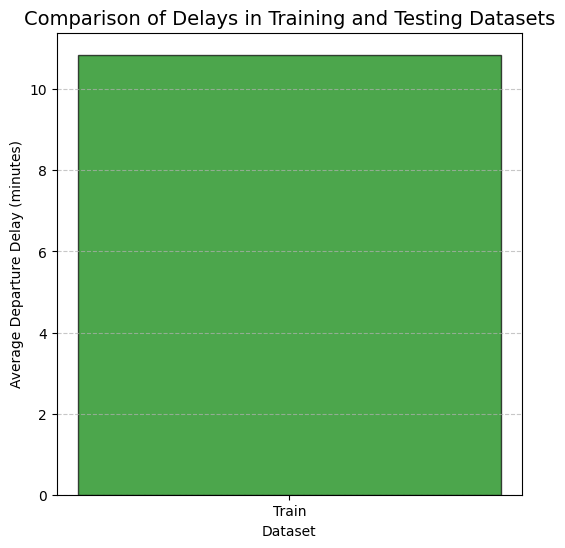

In [55]:
# 3. Comparison
# Compare delays across training and testing datasets
train['Dataset'] = 'Train'
test['Dataset'] = 'Test'
combined_data = pd.concat([train, test], ignore_index=True)

data_grouped = combined_data.groupby('Dataset')['Departure Delay (min)'].mean().reset_index()
plt.figure(figsize=(6, 6))
plt.bar(data_grouped['Dataset'], data_grouped['Departure Delay (min)'], color=['cyan', 'green'], alpha=0.7, edgecolor='black')
plt.title('Comparison of Delays in Training and Testing Datasets', fontsize=14)
plt.xlabel('Dataset', fontsize=10)
plt.ylabel('Average Departure Delay (minutes)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()